In [1]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/Flowers dataset/flowers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Flowers dataset/')
zip_ref.close()

In [2]:
rock_dir = os.path.join('/content/drive/MyDrive/Flowers dataset/flowers')


print('total training rock images:', len(os.listdir(rock_dir)))


rock_files = os.listdir(rock_dir)
print(rock_files[:10])



total training rock images: 6
['daisy', 'dandelion', 'flowers', 'rose', 'sunflower', 'tulip']


In [5]:
import os
daisy_dir = os.path.join('/content/drive/MyDrive/Flowers dataset/flowers/daisy')
dandelion_dir = os.path.join('/content/drive/MyDrive/Flowers dataset/flowers/dandelion')
flowers_dir = os.path.join('/content/drive/MyDrive/Flowers dataset/flowers/flowers')
rose_dir = os.path.join('/content/drive/MyDrive/Flowers dataset/flowers/rose')
sunflower_dir = os.path.join('/content/drive/MyDrive/Flowers dataset/flowers/sunflower')
tulip_dir = os.path.join('/content/drive/MyDrive/Flowers dataset/flowers/tulip')

print('total training rock images:', len(os.listdir(daisy_dir)))
print('total training paper images:', len(os.listdir(dandelion_dir)))
print('total training scissors images:', len(os.listdir(flowers_dir)))
print('total training scissors images:', len(os.listdir(rose_dir)))
print('total training scissors images:', len(os.listdir(sunflower_dir)))
print('total training scissors images:', len(os.listdir(tulip_dir)))

daisy_files = os.listdir(daisy_dir)
print(daisy_files[:10])

dandelion_files = os.listdir(dandelion_dir)
print(dandelion_files[:10])

flowers_files = os.listdir(flowers_dir)
print(flowers_files[:10])

rose_files = os.listdir(rose_dir)
print(rose_files[:10])

sunflower_files = os.listdir(sunflower_dir)
print(sunflower_files[:10])

tulip_files = os.listdir(tulip_dir)
print(tulip_files[:10])

total training rock images: 769
total training paper images: 1055
total training scissors images: 5
total training scissors images: 784
total training scissors images: 734
total training scissors images: 984
['33849854704_d2a2415e4d_n.jpg', '33855966243_01b2486428_n.jpg', '33857335804_7f0c96243b_n.jpg', '33858238653_6549e21f53_n.jpg', '33859244503_eeeca6a397_n.jpg', '33863293993_3ed7515936_n.jpg', '3386988684_bc5a66005e.jpg', '33871813063_d7b6bedafe_n.jpg', '33872893913_72d64a9b85_n.jpg', '33874126263_3f6f965784_n.jpg']
['3476980444_c276bea402_m.jpg', '3483575184_cb8d16a083_n.jpg', '3487229452_73e3004858.jpg', '3491333876_e3fed43c0d.jpg', '3496258301_ca5f168306.jpg', '3499837275_5f24d2f8bf_n.jpg', '3501368412_358e144d1f.jpg', '3502447188_ab4a5055ac_m.jpg', '3505026222_c760df0035_n.jpg', '3509307596_6cfe97867d_n.jpg']
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
['3415176946_248afe9f32.jpg', '3422228549_f147d6e642.jpg', '3450344423_63ba3190e3.jpg', '3451177763_729a4d54af_n.jpg',

IsADirectoryError: ignored

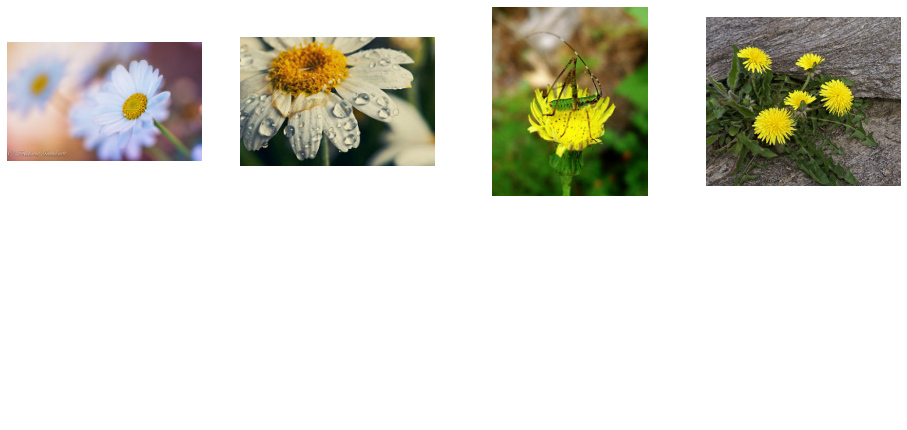

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

next_daisy = [os.path.join(daisy_dir, fname) 
                for fname in daisy_files[pic_index-2:pic_index]]
next_dandelion = [os.path.join(dandelion_dir, fname) 
                for fname in dandelion_files[pic_index-2:pic_index]]
next_flowers = [os.path.join(flowers_dir, fname) 
                for fname in flowers_files[pic_index-2:pic_index]]
next_rose = [os.path.join(rose_dir, fname) 
                for fname in rose_files[pic_index-2:pic_index]]
next_sunflower = [os.path.join(sunflower_dir, fname) 
                for fname in sunflower_files[pic_index-2:pic_index]]
next_tulip = [os.path.join(tulip_dir, fname) 
                for fname in tulip_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_daisy+next_dandelion+next_flowers+next_rose+next_sunflower+next_tulip):
  #print(img_path)
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path, "rb")
  plt.imshow(img)
plt.show()

In [2]:
pip install split-folders


In [3]:
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/Flowers dataset/flowers", output="output", seed=12, ratio=(.8, .1, .1), group_prefix=None) # default values

Copying files: 4326 files [29:29,  2.45 files/s]


In [7]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/output/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/output/val"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=50, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Found 3457 images belonging to 6 classes.
Found 430 images belonging to 6 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_____________________________________

In [8]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 10140303196_b88d3d6cec.jpg to 10140303196_b88d3d6cec (1).jpg
10140303196_b88d3d6cec.jpg
[[1. 0. 0. 0. 0. 0.]]
